# 03. 대시보드 구현하기

### 3.1 공통 모듈 불러오기 및 설정

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from streamlit_option_menu import option_menu

font = {'fontsize':18, 'fontstyle':'italic', 'backgroundcolor':'white', 'color':'black', 'fontweight': 'bold'} # for plot title
sns.set_theme(style='whitegrid', font_scale=1.5)
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

import streamlit as st
from datetime import date

### 3.2 분석할 데이터 읽어오기

In [45]:
df = pd.read_csv(fr'../data/input/data.csv', encoding='utf-8', low_memory=False)
df.head()

,학년도,시도별,학교급,학년,성별,생년월일,키_cm,몸무게_kg,비만여부,건강검진일,...,가족지지,체벌경험,상담요청,가족흡연,가족음주,무기력감,수업태도교정,과잉행동,주의력산만,상담희망
0,2016,서울,초,1,남,NaN,130.2,26.5,정상,NaN,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
1,2016,서울,초,1,남,NaN,123.1,27.7,과체중,NaN,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
2,2016,서울,초,1,남,NaN,117.2,19.1,정상,NaN,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
3,2016,서울,초,1,남,NaN,123.5,22.2,정상,NaN,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
4,2016,서울,초,1,남,NaN,123.5,22.2,정상,NaN,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN


### 3.3 웹페이지 타이틀 설정하기

In [46]:
st.set_page_config(page_title='Elementary Student Growth Analysis Dashboard', 
                   page_icon='👩‍👩‍👧‍👧', layout='wide')
st.title("초등학생 성장발달 분석")

title_with_image_html = '''
<div style="display: flex; align-items: center;">
    <img src="https://via.placeholder.com/40" style="margin-right: 20px;">
    <h1>My Streamlit App</h1>
</div>
'''

# Markdown을 사용하여 HTML 렌더링
st.markdown(title_with_image_html, unsafe_allow_html=True)

DeltaGenerator()

### 3.4 새로고침 버튼 추가

In [47]:
if st.button('새로고침'):
    st.experimental_rerun()

#### 3.5 사이드바 꾸미기
* https://icons.getbootstrap.com/ 에 아이콘 선택
* pip install streamlit-option-menu 설치 필요

In [48]:
st.sidebar.header("날짜 조건")
# 현재 연도 가져오기
first_year = 2015
last_year = 2022
col1, col2 = st.sidebar.columns(2)
with col1:
    start_year = st.selectbox("시작 연도", list(range(first_year, last_year)), index=0)
with col2:
    end_year = st.selectbox("종료 연도", list(range(first_year+1, last_year+1)), index=last_year-first_year-1)

# 종료 연도가 시작 연도보다 이전일 경우 오류 메시지 표시
if start_year > end_year:
    st.error("오류: 종료 연도는 시작 연도 이후여야 합니다.")

df = df[(df['학년도'] >= start_year) & (df['학년도'] <= end_year)]


In [49]:
def first_page_draw():
    st.header('0. 데이터 소개')
    st.write('* 교육부_학생건강검사 표본조사')
    st.write('* 체계적이고 신뢰성 있는 학생건강지표를 생성하고자 표본학교를 대상으로 분석된 통계데이터입니다. 생성된 통계는 ‘통계법』제17조에 근거한 정부 지정통계(승인번호 112002호)입니다.')
    # 아이콘과 링크를 HTML로 생성
    link_icon_html = '''* 출처 : 공공데이터포털
    <a href="https://www.data.go.kr/data/15100360/fileData.do" target="_blank">
        <img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABwAAAAcCAMAAABF0y+mAAAANlBMVEUAXqoAXqoAWKgAVKZSjcKyyeHD0uWMstZ0oczt9Pn////1+PvV5PFrnMqYvt0ATaQwd7cAXqp66WfTAAAAEnRSTlOS/////////////////////6e+bY7iAAAAo0lEQVR4AaXSRQKDQAxA0UbG/f6XbfBQl7+Dh4xdLvA0ZQ96i0inUCOysUfGMaBCH6Iqhcx0hypHGm3xc8XVnEQNKqwN1wg5x5gcKiTYoy6aOz5EwD799gkCWfkrPEa5M3/3CbIg/4QuRtvhCebnAyIZT/D4CFGu56/u6NoWsBELjAcmVZTEDjwX4NiykoMue0DYsRcV94l2FNbB0R/ndjy3cQWaWwzHLpuneAAAAABJRU5ErkJggg==" alt="link icon"/>
    </a>
    '''
    st.write('* 제공기관 : 교육부')  
    st.markdown(link_icon_html, unsafe_allow_html=True)

    col1, col2, col3, col4, col5 = st.columns(5)
    col1.metric(label = "총 데이터 건수", value = f'총 {df.shape[0]} 건')
    col2.metric(label = "총 컬럼수", value = f'총 {len(df.columns)}개')
    col3.metric(label = "데이터 범위", value = f'{df['학년도'].min()}년~{df['학년도'].max()}년')
    col4.metric(label = "데이터 대상", value = f'초등학생 {df['학년'].min()}학년~{df['학년'].max()}학년')
    col5.metric(label = "대상 시도", value = f'총 {len(df['시도별'].unique())}개')

    st.header('2. 데이터 컬럼 정보')

    file_path = '../data/input/column_info.txt'
    with open(file_path, 'r') as file:
        file_contents = file.read()

    st.markdown(file_contents)

In [50]:
grade_arr = np.append('전체', df['학년'].unique().astype(str))
grade_frame = col1.selectbox("학년", grade_arr)

In [51]:
def second_page_draw():
    st.header('1. 키 성장 변화')
    grade_frame = st.selectbox("학년", grade_arr)
    df1 = df.groupby(['학년도', '학년']).agg({'키_cm' : 'mean'}).sort_values(['학년도', '학년']).reset_index()
    df1.head()  
    years = [ i  for i in np.arange(start_year, end_year+1) ]
    if start_year <= 2020 and end_year >= 2020:
        years.remove(2020)

    heights_by_grade = {
        '1학년': df1[df1['학년'] == 1]['키_cm'].to_list(),
        '2학년': df1[df1['학년'] == 2]['키_cm'].to_list(),
        '3학년': df1[df1['학년'] == 3]['키_cm'].to_list(),
        '4학년': df1[df1['학년'] == 4]['키_cm'].to_list(),
        '5학년': df1[df1['학년'] == 5]['키_cm'].to_list(),
        '6학년': df1[df1['학년'] == 6]['키_cm'].to_list(),
    }

    # 다중 라인 그래프 그리기
    fig = plt.figure(figsize=(6,5))

    for grade, heights in heights_by_grade.items():
        plt.plot(years, heights, label=grade)

    plt.title('학년별 평균 키 변화추이', fontdict=font, pad=15)
    plt.xlabel('Year')
    plt.ylabel('평균 키 (cm)')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.xticks(years)
    plt.show()
    st.pyplot(fig)

[46.88127171646977, 48.18288318703579, 48.13710826210826, 49.22391239123912, 48.820111567821485, 52.1498912833178, 50.966986089644514]
[45.47925591882751, 45.71069679849341, 46.28402255639098, 45.96733716475096, 46.13581995593327, 47.78665571639344, 47.567972575905976]


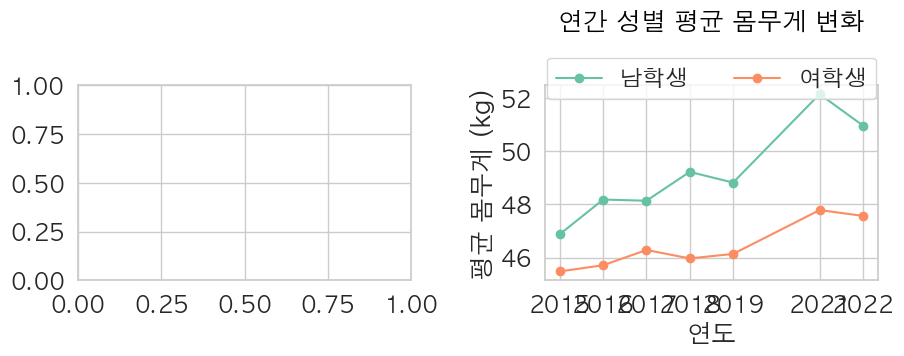

In [60]:
fig, ax = plt.subplots(1,2,figsize=(10,3))
grade_frame = '6'
if grade_frame != '전체':
        df2 = df[df['학년']==int(grade_frame)].groupby(['학년도', '성별']).agg({'몸무게_kg' : 'mean'}).sort_values(['학년도',  '성별']).reset_index()
else :
    df2 = df.groupby(['학년도', '성별']).agg({'몸무게_kg' : 'mean'}).sort_values(['학년도',  '성별']).reset_index()

years = [ i  for i in np.arange(start_year, end_year+1) ]
male_weights = df2[df2['성별'] == '남']['몸무게_kg'].to_list()
female_weights = df2[df2['성별'] == '여']['몸무게_kg'].to_list()


print(male_weights)
print(female_weights)
label_name = ''
if grade_frame != '전체':
    label_name = '('+grade_frame+'학년)'
if start_year <= 2020 and end_year >= 2020:
    years.remove(2020)
ax[1].plot(years, male_weights, marker='o', label=f'남학생')
ax[1].plot(years, female_weights, marker='o', label=f"여학생")

ax[1].set_title('연간 성별 평균 몸무게 변화', fontdict=font, pad=40)
ax[1].set_xlabel('연도')
ax[1].set_ylabel('평균 몸무게 (kg)')
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)
ax[1].grid(True)
ax[1].set_xticks(years)  # x축 눈금을 연도로 설정
fig.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.2, wspace=0.4)

In [ ]:
with st.sidebar:
    choice = option_menu("목록", ["데이터 소개", "신체발달", "건강지수", "생활습관", "사회환경요소"],
                         icons=['exclamation-square', 'bar-chart', 'bi bi-robot', 'clipboard-data', 'person-lines-fill'],
                         menu_icon="app-indicator", default_index=0,
                         styles={
                            "container": {"padding": "4!important", "background-color": "#fafafa"},
                            "icon": {"color": "black", "font-size": "25px"},
                            "nav-link": {"font-size": "16px", "text-align": "left", "margin":"0px", "--hover-color": "#fafafa"},
                            "nav-link-selected": {"background-color": "#08c7b4"},
                        }
            )
    

if choice == "데이터 소개":
    first_page_draw()
elif choice == "신체발달":
    second_page_draw()
elif choice == "건강지수":
    st.title("Contact Page")
    st.write("Get in touch with me.")
elif choice == "생활습관":
    st.title("Contact Page")
    st.write("Get in touch with me.")
elif choice == "사회환경요소":
    st.title("Contact Page")
    st.write("Get in touch with me.")